**<font color = black size=6>实验三:逻辑回归</font>**

**<font color = blue size=4>第一部分:函数介绍</font>**

<span style="color:purple">机器学习所使用的数据集并不一定能够直接进行使用，如可能出现缺失值或者异常值（如异常0或者异常大的数据），又或者是数据类型不适合直接应用于模型训练等。因此，数据预处理是机器学习过程中十分重要的一个部分。<br>本次实验包括数据预处理，包括判断数据是否有缺失值以及异常值、缺失值替换操作、并将部分特征值类型转换为适合模型训练的类型。在进行逻辑回归实验之前，首先介绍下上述操作所用到的python语法。</span>

<span style="color:purple">1) 判断一列中是否有缺失值</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#通过pandas将csv文件转换为dataframe格式后进行操作
train1_frame = pd.read_csv('introduction.csv')
#该数据描述了不同性别的人的身高和体重数据
print(train1_frame)
#打印出数据，观察数据异常值情况

   height  weight     sex
0   170.0    54.0    Male
1   180.0     NaN    Male
2   164.0    48.0  Female
3     NaN    66.0    Male
4   176.0     NaN  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0     0.0  Female
9     NaN    50.0  Female


In [5]:
#可发现数据异常值包括0和空值(即NAN)
#判断每一列是否有空值并返回每列空值的数量
print(train1_frame.isnull().sum())
print(train1_frame)

height    2
weight    2
sex       0
dtype: int64
   height  weight     sex
0   170.0    54.0    Male
1   180.0     NaN    Male
2   164.0    48.0  Female
3     NaN    66.0    Male
4   176.0     NaN  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0     0.0  Female
9     NaN    50.0  Female


<span style="color:purple">2) 对每一列的缺失值和异常值进行替换操作</span>

In [6]:
#先将0替换为空值，之后可考虑将空值替换为平均值。
train1_frame[['height', 'weight']]=train1_frame[['height', 'weight']].replace(0, np.NaN)
print(train1_frame)

   height  weight     sex
0   170.0    54.0    Male
1   180.0     NaN    Male
2   164.0    48.0  Female
3     NaN    66.0    Male
4   176.0     NaN  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0     NaN  Female
9     NaN    50.0  Female


In [7]:
#替换空值为平均值
# 先分离 height 列和weight列
height_column = train1_frame['height']
weight_column = train1_frame['weight']
# 按性别分类并计算每组的平均身高和平均体重
mean_height_by_gender = train1_frame.groupby('sex')['height'].transform('mean')
mean_weight_by_gender = train1_frame.groupby('sex')['weight'].transform('mean')

# 使用每个性别组的平均值来替换缺失值
train1_frame['height'].fillna(mean_height_by_gender, inplace=True)
train1_frame['weight'].fillna(mean_weight_by_gender, inplace=True)
# 打印结果


<span style="color:purple">3) 将标记值从字符串变成容易操作的整数类型</span>

In [8]:
# 将分类的字符串转换为整数进行处理
# Male为0，Female为1
train1_frame['sex'] = np.where(train1_frame['sex'] == "Male", 0, 1)
print(train1_frame)

   height  weight  sex
0   170.0   54.00    0
1   180.0   56.25    0
2   164.0   48.00    1
3   166.5   66.00    0
4   176.0   52.00    1
5   162.0   59.00    0
6   154.0   46.00    0
7   155.0   58.00    1
8   165.0   52.00    1
9   165.0   50.00    1


<span style="color:purple">4) 可视化分类决策边界</span>

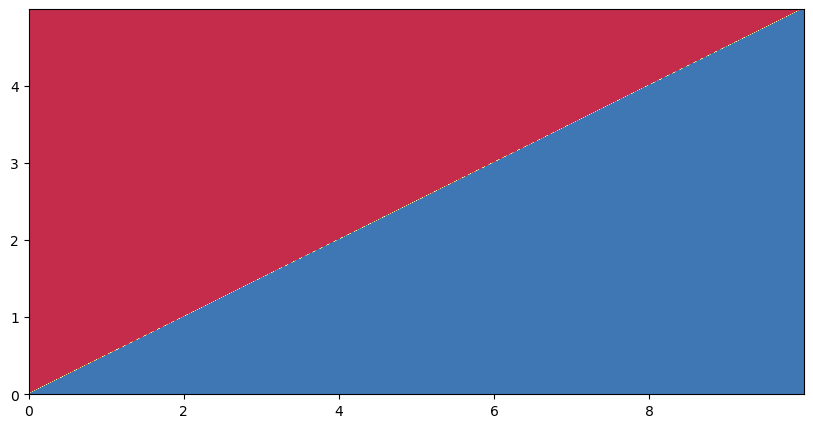

In [9]:
#确定图画边界和大小
plt.figure(figsize=(10,5))
x_min, x_max = 0,10
y_min, y_max = 0,5
#使用numpy中的meshgrid生成网格矩阵，方便进行之后的描点
boundary_x, boundary_y = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
grid = np.c_[boundary_x.ravel(), boundary_y.ravel()]
#加入偏置(或w_0)对应的特征为1的一列
e=np.ones((len(grid),1))
grid=np.c_[e,grid]
#假定下列的模型参数
w=np.array([[0],[3],[-6]])
#计算出网格点中每个点对应的逻辑回归预测值
z=grid.dot(w)
for i in range(len(z)):
    z[i][0]=(1/(1+np.exp(-z[i][0])))
    if(z[i][0]<0.5):z[i][0]=0
    else:z[i][0]=1
#转换shape以作出决策边界
z=z.reshape(boundary_x.shape)
plt.contourf(boundary_x, boundary_y, z, cmap=plt.cm.Spectral, zorder=1)
plt.show()

<span style="color:purple">5) 散点图</span>

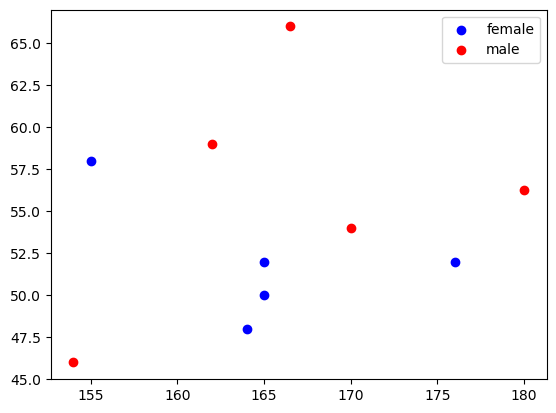

In [10]:
"""
可使用plt.scatter来绘制出测试集的每个样本点,并设置指定颜色来区分预测正确和错误的样本
plt.scatter(x,y,c="color"),x、y为坐标值,c为指定颜色
"""

class_1=train1_frame[train1_frame['sex']==1]# female
class_0=train1_frame[train1_frame['sex']==0]# male
plt.scatter(class_1['height'],class_1['weight'],c='blue',label='female')# female
plt.scatter(class_0['height'],class_0['weight'],c='red',label='male')# male
plt.legend()
plt.show()

**<font color = blue size=4>第二部分:逻辑回归</font>**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl

<span>Iris数据集（鸢尾花卉数据集）是常用的分类实验数据集,是一类多重变量分析的数据集。我们实验选取数据集的部分内容，包含训练集80个数据样本和测试20个样本。每个数据有2个属性：花萼长度 ($x_1$)，花萼宽度($x_2$)。通过这2个属性预测鸢尾花卉属于（Setosa，Versicolour）二个种类中的哪一类。</span>

<span>1) 使用pandas库将训练数据集'flower_train.csv'与测试数据集'flower_test.csv'载入到Dataframe对象中。判断训练集中每列数据是否有缺失值或者不合理的数值，如果有，请进行数据预处理。测试集为完好的数据集，不需要进行预处理。由于花卉类型(type)为字符串类型，请将训练集和测试集中花卉类型转换为适合模型训练的类型</span>

In [12]:
# 预处理数据集
flower_train_df = pd.read_csv('flower_train.csv')
flower_test_df = pd.read_csv('flower_test.csv')

print(flower_train_df.columns)
print(flower_train_df.isnull().sum())
# 先将0替换为nan
flower_train_df.replace(0,np.NaN,inplace=True)
# 替换为平均值
flower_train_ave_x1_by_type = flower_train_df.groupby(['type'])['x1'].transform('mean')
flower_train_ave_x2_by_type = flower_train_df.groupby(['type'])['x2'].transform('mean')
flower_train_df['x1'].fillna(flower_train_ave_x1_by_type,inplace=True)
flower_train_df['x2'].fillna(flower_train_ave_x2_by_type,inplace=True)
print('after----')
print(flower_train_df.isnull().sum())
print(flower_train_df)

# 将type转换为整数
flower_train_df['type'] = np.where(flower_train_df['type']=='Iris-setosa',0,1) # Iris-setosa为0
print(flower_train_df[:10])

Index(['x1', 'x2', 'type'], dtype='object')
x1      5
x2      6
type    0
dtype: int64
after----
x1      0
x2      0
type    0
dtype: int64
          x1        x2             type
0   5.032432  3.500000      Iris-setosa
1   4.900000  3.000000      Iris-setosa
2   4.700000  3.200000      Iris-setosa
3   4.600000  3.100000      Iris-setosa
4   5.000000  3.600000      Iris-setosa
..       ...       ...              ...
75  5.700000  2.748649  Iris-versicolor
76  5.700000  2.900000  Iris-versicolor
77  6.200000  2.900000  Iris-versicolor
78  5.100000  2.748649  Iris-versicolor
79  5.700000  2.800000  Iris-versicolor

[80 rows x 3 columns]
         x1        x2  type
0  5.032432  3.500000     0
1  4.900000  3.000000     0
2  4.700000  3.200000     0
3  4.600000  3.100000     0
4  5.000000  3.600000     0
5  5.400000  3.900000     0
6  4.600000  3.443243     0
7  5.000000  3.400000     0
8  4.400000  2.900000     0
9  4.900000  3.100000     0


<span>2线性模型为$y=\omega^T x$，在这里，我们将偏置量b当成模型参数$w_0$，并额外引入$x_0=1$这一特征。请相应地往测试集和训练集添加$x_0=1$这一特征。
 
tips:上一次实验中的矩阵求解析解的方法中，需要往特征中加入一列全1的特征量，此处类似。</span>

In [13]:
# 添加全1的特征量
flower_train_df['x0'] = np.ones((flower_train_df.shape[0],1),dtype=int)
flower_test_df['x0'] = np.ones((flower_test_df.shape[0],1),dtype=int)  
print(flower_train_df)
print(flower_test_df)

          x1        x2  type  x0
0   5.032432  3.500000     0   1
1   4.900000  3.000000     0   1
2   4.700000  3.200000     0   1
3   4.600000  3.100000     0   1
4   5.000000  3.600000     0   1
..       ...       ...   ...  ..
75  5.700000  2.748649     1   1
76  5.700000  2.900000     1   1
77  6.200000  2.900000     1   1
78  5.100000  2.748649     1   1
79  5.700000  2.800000     1   1

[80 rows x 4 columns]
     x1   x2             type  x0
0   5.0  3.5      Iris-setosa   1
1   4.5  2.3      Iris-setosa   1
2   4.4  3.2      Iris-setosa   1
3   5.0  3.6      Iris-setosa   1
4   5.1  3.8      Iris-setosa   1
5   4.8  3.0      Iris-setosa   1
6   5.1  3.7      Iris-setosa   1
7   4.6  3.2      Iris-setosa   1
8   5.3  3.7      Iris-setosa   1
9   5.0  3.3      Iris-setosa   1
10  7.0  3.2  Iris-versicolor   1
11  6.4  3.2  Iris-versicolor   1
12  6.9  3.1  Iris-versicolor   1
13  5.5  2.3  Iris-versicolor   1
14  6.5  2.8  Iris-versicolor   1
15  5.7  2.8  Iris-versicolor   1
16 

<span style="color:purple">3) 由于逻辑回归的原理是用逻辑函数把线性回归的结果(-∞,∞)映射到(0,1)所以逻辑回归适合于二分类问题。我们使用sigmoid函数$g(z)=\frac{1}{1+e^{-z}}$将把线性回归的结果从(-∞,∞)映射到(0,1)。  
    假设模型为线性回归模型$\hat{y}=\omega_0+\omega_1 x_1+\omega_2 x_2+...+\omega_n x_n=\omega^T x$，则在给定样本特征$x$,其标记$y=1$的概率为$$P(y=1|x,w)=\frac{1}{1+e^{-\omega^T x}}$$  
    对应于任意一个样本(${x_i}$,$y_i$),其中$x_i$为特征值，$y_i$为实际标记值,在参数$\omega$下，该样本发生的概率为$$P(y_i|x_i,\omega)=y_i{P(y_i=1|x_i,\omega)}+({1-y_i}){P(y_i=0|x_i,\omega)}$$
    将每个样本发生概率相乘，得到似然函数:$$\Pi^m_{i=1}{P(y_i|x_i,\omega)}$$
    为了计算方便，一般取对数得到对数似然函数:$$L(\omega)=\sum^m_{i=1}{lnP(y_i|x_i,\omega)}$$  
    我们总是希望出现预测正确的概率的可能性最大，即想要得到极大化似然函数对应的参数$\omega$。我们进一步将最大化似然函数就转变为最小化似然函数的负数，以方便使用梯度下降法进行求解。取负的平均对数似然函数为损失函数,通过这样构建的损失函数$$J(\omega)=-\frac{1}{m}\sum^m_{i=1}{lnP(y_i|x_i,\omega)}=-\frac{1}{m}\sum^m_{i=1}ln(y_i\frac{1}{1+e^{-\omega^T x_i}}+(1-y_i)\frac{e^{-\omega^T x_i}}{1+e^{-\omega^T x_i}})$$  
    手动实现梯度下降法(不使用机器学习框架，如PyTorch、TensorFlow等)来进行模型的训练。  </span>

<span style="color:purple">算法步骤如下：①初始化模型参数$\omega$的值；②在负梯度的方向上更新参数(由于该实验涉及样本数量较小，建议使用批量梯度下降)，并不断迭代这一步骤。</span>

<span style="color:purple">其中梯度的下降偏导公式为
    $$\frac{\partial J}{\partial \omega_j}=\frac{1}{m}\sum_{i=1}^m x_{ij}(\frac{e^{\omega^T x_i}}{1+e^{\omega^T x_i}}-y_i)$$  
    参数更新的公式为$$\omega_j =\omega_j-\eta\frac{\partial J}{\partial w_j}$$其中$\eta$表示学习率，$m$则表示批量中的样本数量，$x_{ij}$代表着第i个样本的第j个特征值,$y_i$代表着第i个样本的真实值</span>


In [24]:
# 计算概率
# 初始值 w0 w1 w2
w = np.array([0,0,0])
x = flower_train_df[['x0','x1','x2']].to_numpy()
y = flower_train_df[['type']].to_numpy()
# print(x[:10])
# 计算概率函数
flower_train_probability = 1/(1+np.exp(-w@x))
print(flower_train_probability)
# 计算似然函数
# likelihood_func = flower_train_probability.sum()
# print(likelihood_func)
# 计算对数似然函数
# log_likelihood_func = np.log(1 / flower_train_probability).sum()
# 损失函数
# J = (-1/m)*log_likelihood_func

# 梯度下降计算
# 参数设置
learning_rate = 0.01
num_iter = 1000
m = x.shape[0]
min_step = 0.001

# 迭代计算
for i in range(num_iter):
    # cal grad
    print(x.shape)
    print((np.exp(w@x)/(1+np.exp(w@x))).shape)

    gradient = (x * (np.exp(w@x)/(1+np.exp(w@x)) - y))/m
    
    # 当迭代的差异量小于一个值，停止迭代
    if(math.abs(learning_rate * gradient) < min_step):
        print('break')
        break
    # step
    w = w - learning_rate * gradient
    
    
print(w)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
(80, 3)
(80,)


ValueError: operands could not be broadcast together with shapes (80,3) (80,80) 

<span style="color:purple">4)在模型训练完成后得到所训练的模型参数$\omega$，在测试集上进行所训练模型的测试并使用之前所介绍的损失函数计算loss值</span>

In [ ]:
#your code here------





<span style="color:purple">5)使用训练后的逻辑回归模型对测试数据集'flower_test.csv'进行预测，输出可视化结果（比如用seaborn或者matplotlib等可视化库来画出测试数据的散点图以及训练好的模型函数图像)，要求如下:  
    1.将所得到的逻辑回归模型所得到的决策边界绘制出来  
  2.测试集的所有点在同一幅图中进行绘制  
  3.需要给不同类别的测试点不同颜色，方便通过颜色的区别直观看到预测正确和错误的样本</span>

In [ ]:
#your code here------





**<font color = blue size=4>第三部分:逻辑回归实验二</font>**

<span style="color:purple">该数据集(train_titanic.csv和test_titanic.csv)同样为分类数据集，为泰坦尼克号的乘客信息以及最后是否生还。每个包括了七个特征值以及标记(代表是否生还),特征信息分别为Passengerid(乘客id)，Age(乘客年龄)，Fare(船票价格),Sex(性别)，sibsp(堂兄弟妹个数)，Parch(父母与小孩的个数)，Pclass(乘客等级)</span>

<span style="color:purple">该数据集已经做了处理，无缺失值和空值，且字符串类型全部转换成了整数类型，你们需要进行判断，在七个特征值至少选择四个你认为与最后是否生还关联度高的特征类别。该实验的任务依然是在训练集上使用逻辑回归方法和手动实现的梯度下降方法完成模型训练。</span>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

<span style="color:purple">1) 使用pandas库将训练数据集'train_titanic.csv'与测试数据集'test_titanic.csv'载入到Dataframe对象中</span>

In [ ]:
#your code here------



<span style="color:purple">2)利用上个实验所使用的梯度下降方法(由于该数据集样本数量较大，所以建议使用随机批量或小批量)进行模型训练</span>

In [ ]:
#your code here------



<span style="color:purple">3) 使用训练后的逻辑回归模型对测试数据集'test_titanic.csv'进行预测，并计算其loss值：</span>

In [ ]:
#your code here------



**<font color = blue size=4>第四部分:作业提交链接</font>**

1.实验报告提交链接(有效期直至9.22 14:20): https://send2me.cn/uohF8xm-/SvKmbAQRlFSKqQ

实验报告需包含：内容，代码，解释，结果，总结

2.实验课件获取链接: https://www.jianguoyun.com/p/DZzHw20Qp5WhChjwoZwFIAA